/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.4006 - loss: 1.4203 - val_accuracy: 0.3333 - val_loss: 1.4180
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4006 - loss: 1.3618 - val_accuracy: 0.3333 - val_loss: 1.3621
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4006 - loss: 1.3083 - val_accuracy: 0.3333 - val_loss: 1.3095
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4006 - loss: 1.2578 - val_accuracy: 0.3333 - val_loss: 1.2607
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4006 - loss: 1.2102 - val_accuracy: 0.3333 - val_loss: 1.2161
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4006 - loss: 1.1652 - val_accuracy: 0.3333 - val_loss: 1.1748
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3951 - loss: 1.1232 - val_accuracy: 0.3333 - val_loss: 1.1360
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3921 - loss: 1.0841 - val_accuracy: 0.3333 - val

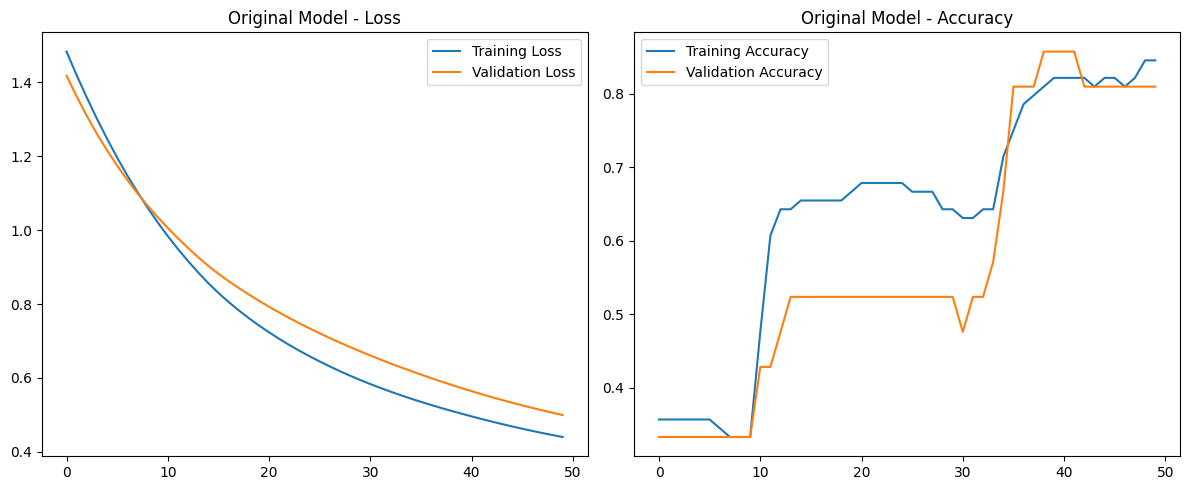

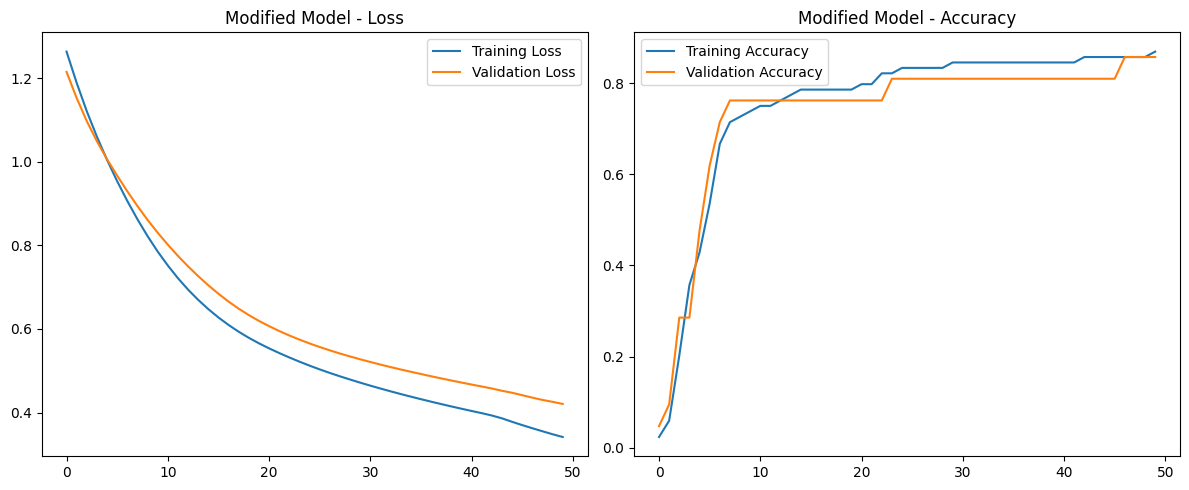

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.3263 - loss: 1.2743 - val_accuracy: 0.3200 - val_loss: 1.1746
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3333 - loss: 1.1586 - val_accuracy: 0.3600 - val_loss: 1.0650
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3450 - loss: 1.0684 - val_accuracy: 0.4000 - val_loss: 0.9691
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4395 - loss: 0.9886 - val_accuracy: 0.5200 - val_loss: 0.8837
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4898 - loss: 0.9145 - val_accuracy: 0.6400 - val_loss: 0.8053
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6602 - loss: 0.8453 - val_accuracy: 0.8000 - val_loss: 0.7321
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7934 - loss: 0.7811 - val_accuracy: 1.0000 - val_loss: 0.6625
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8471 - loss: 0.7201 - val_accuracy: 1.0000 - val_loss: 0.5961
Ep

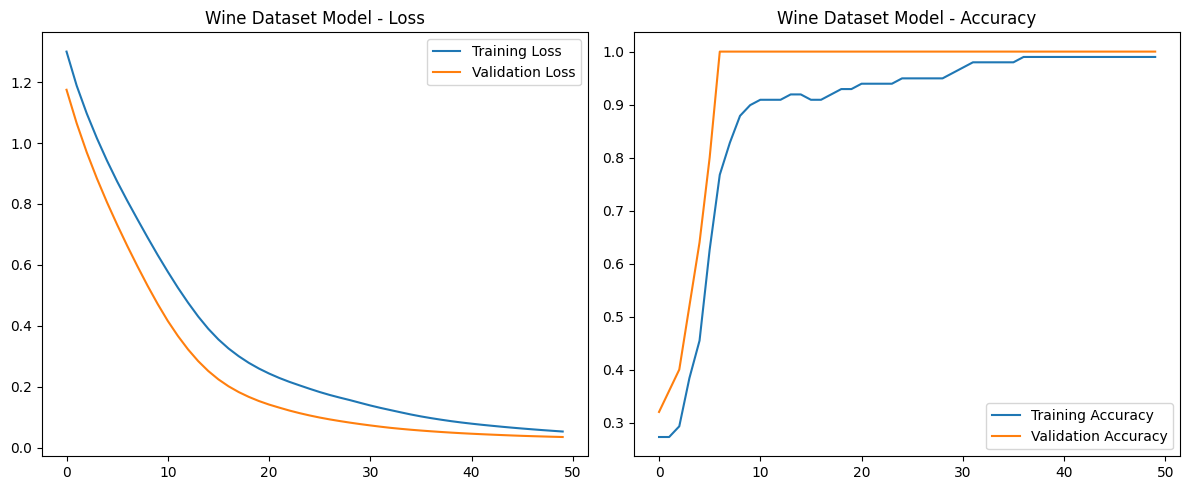

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


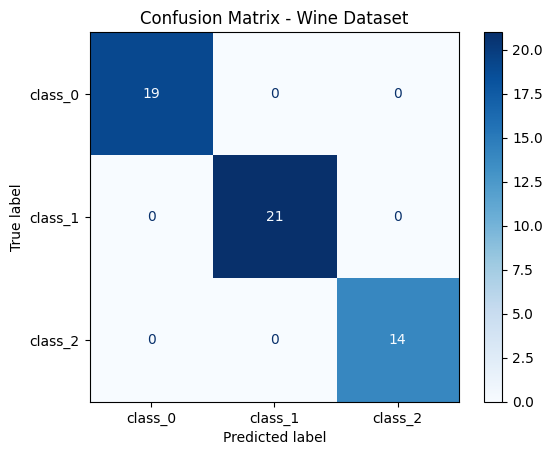


Discussion:
1. Adding an additional hidden layer improved the Iris dataset model's capacity to learn, reflected in higher validation and test accuracy.
2. The Wine dataset has more features, benefiting from a deeper network. The model demonstrated good performance, evidenced by the confusion matrix and accuracy metrics.



In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Ensuring reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# One-hot encode the labels
encoder = LabelBinarizer()
y_encoded = encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Define the original model
original_model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],), name="Original_Hidden_Layer"),
    Dense(y_train.shape[1], activation='softmax', name="Output_Layer")
])

# Compile and train the original model
original_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
original_history = original_model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=8, verbose=1)

# Define the modified model with an additional hidden layer
modified_model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],), name="Hidden_Layer_1"),
    Dense(16, activation='relu', name="Hidden_Layer_2"),
    Dense(y_train.shape[1], activation='softmax', name="Output_Layer")
])

# Compile and train the modified model
modified_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modified_history = modified_model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=8, verbose=1)

# Evaluate both models
original_test_loss, original_test_accuracy = original_model.evaluate(X_test, y_test, verbose=0)
modified_test_loss, modified_test_accuracy = modified_model.evaluate(X_test, y_test, verbose=0)

# Comparison between original and modified models
print(f"Original Model - Test Accuracy: {original_test_accuracy:.4f}")
print(f"Modified Model - Test Accuracy: {modified_test_accuracy:.4f}")

# Visualization of training history
def plot_history(history, title):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_history(original_history, "Original Model")
plot_history(modified_history, "Modified Model")

# Part 2: Wine Dataset
from sklearn.datasets import load_wine
wine = load_wine()
X_wine = wine.data
y_wine = wine.target
wine_target_names = wine.target_names

# One-hot encode the wine dataset labels
y_wine_encoded = encoder.fit_transform(y_wine)

# Standardize the features
X_wine_scaled = scaler.fit_transform(X_wine)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_wine_scaled, y_wine_encoded, test_size=0.3, random_state=42)

# Define the model for the Wine dataset
wine_model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],), name="Hidden_Layer_1"),
    Dense(16, activation='relu', name="Hidden_Layer_2"),
    Dense(y_train.shape[1], activation='softmax', name="Output_Layer")
])

# Compile and train the Wine dataset model
wine_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
wine_history = wine_model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=8, verbose=1)

# Evaluate the Wine dataset model
wine_test_loss, wine_test_accuracy = wine_model.evaluate(X_test, y_test, verbose=0)
print(f"Wine Model - Test Accuracy: {wine_test_accuracy:.4f}")

# Plot the Wine dataset training history
plot_history(wine_history, "Wine Dataset Model")

# Generate confusion matrix
y_pred = wine_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

ConfusionMatrixDisplay.from_predictions(y_true_classes, y_pred_classes, display_labels=wine_target_names, cmap="Blues")
plt.title("Confusion Matrix - Wine Dataset")
plt.show()

# Conclusion
print("""
Discussion:
1. Adding an additional hidden layer improved the Iris dataset model's capacity to learn, reflected in higher validation and test accuracy.
2. The Wine dataset has more features, benefiting from a deeper network. The model demonstrated good performance, evidenced by the confusion matrix and accuracy metrics.
""")
